# Import libraries

In [1]:
!pip install --upgrade numpy scipy

  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [1]:
from numpy import array, arange, nan
from scipy import interpolate

In [2]:
!pip install --upgrade git+https://github.com/ParkhomenkoDV/substance.git

  Cloning https://github.com/ParkhomenkoDV/substance.git to c:\users\parkh\appdata\local\temp\pip-req-build-4n0ruwx0
  Resolved https://github.com/ParkhomenkoDV/substance.git to commit 996edd4d1daa523c75d61b0e8bb06aa5f5eb7b13
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for substance: filename=substance-2025.4.3.16.2-py3-none-any.whl size=31608 sha256=4ce6f6dc7516837517fa437bdddd470fdddd207f47c4da11e5be96f5b37dddaa
  Stored in directory: C:\Users\parkh\AppData\Local\Temp\pip-ephem-wheel-cache-jw6437ey\wheels\a2\f0\91\f4fe68c50cedb5c9d3e67674a165f0c8e9038b814cfe512b24
Successfully built substance


  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-4n0ruwx0'


In [2]:
from substance import Material, materials

In [3]:
Material.help()

Material parameters:
type value must be int, float, array with shape (-1,2) or callable(int | float)
		density
			description: плотность
			unit: [кг/м^3]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x000001C7BCB832E0>,)
		alpha
			description: коэффициент линейного расширения
			unit: [1/К]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x000001C7BCB83380>,)
		E
			description: модуль Юнга I рода
			unit: [Па]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x000001C7BCB83420>,)
		G
			description: модуль (сдвига) Юнга II рода
			unit: [Па]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function Material.<lambda> at 0x000001C7BCB834C0>,)
		mu
			description: коэффициент Пуассона
			unit: []
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<

In [4]:
material = Material('test',  # тестируемый материал
                        {
                            "density": 8400,  # int
                            "alpha": interpolate.interp1d((400, 600, 800),
                                                          array((18, 18, 18)) * 10 ** -6,
                                                          kind=1, bounds_error=False, fill_value='extrapolate'),
                            "E": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                      array([1.74, 1.66, 1.57, 1.47, 1.32]) * 10 ** 11,
                                                      kind=3, bounds_error=False, fill_value=nan),
                            "mu": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                       (0.384, 0.379, 0.371, 0.361, 0.347),
                                                       kind=3, bounds_error=False, fill_value='extrapolate'),
                            "c": lambda t: 4200,  # lambda
                            "l": ((0, 16), (100, 18), (200, 19), (400, 19.5)),  # tuple
                            "HV": array(((0, 16), (100, 18), (200, 19), (400, 19.5))),  # array
                            "smth": 3.1415  # float
                        })

In [5]:
temperature, t = arange(200, 1_200 + 1, 50), 700

In [6]:
for k, v in material.__dict__.items():
        if callable(v):
            print('\t' + f'{k}({t}): {v(t)}')

	density(700): 8400.0
	alpha(700): 1.8e-05
	E(700): 147000000000.0
	mu(700): 0.361
	c(700): 4200
	l(700): nan
	HV(700): nan
	smth(700): 3.1415


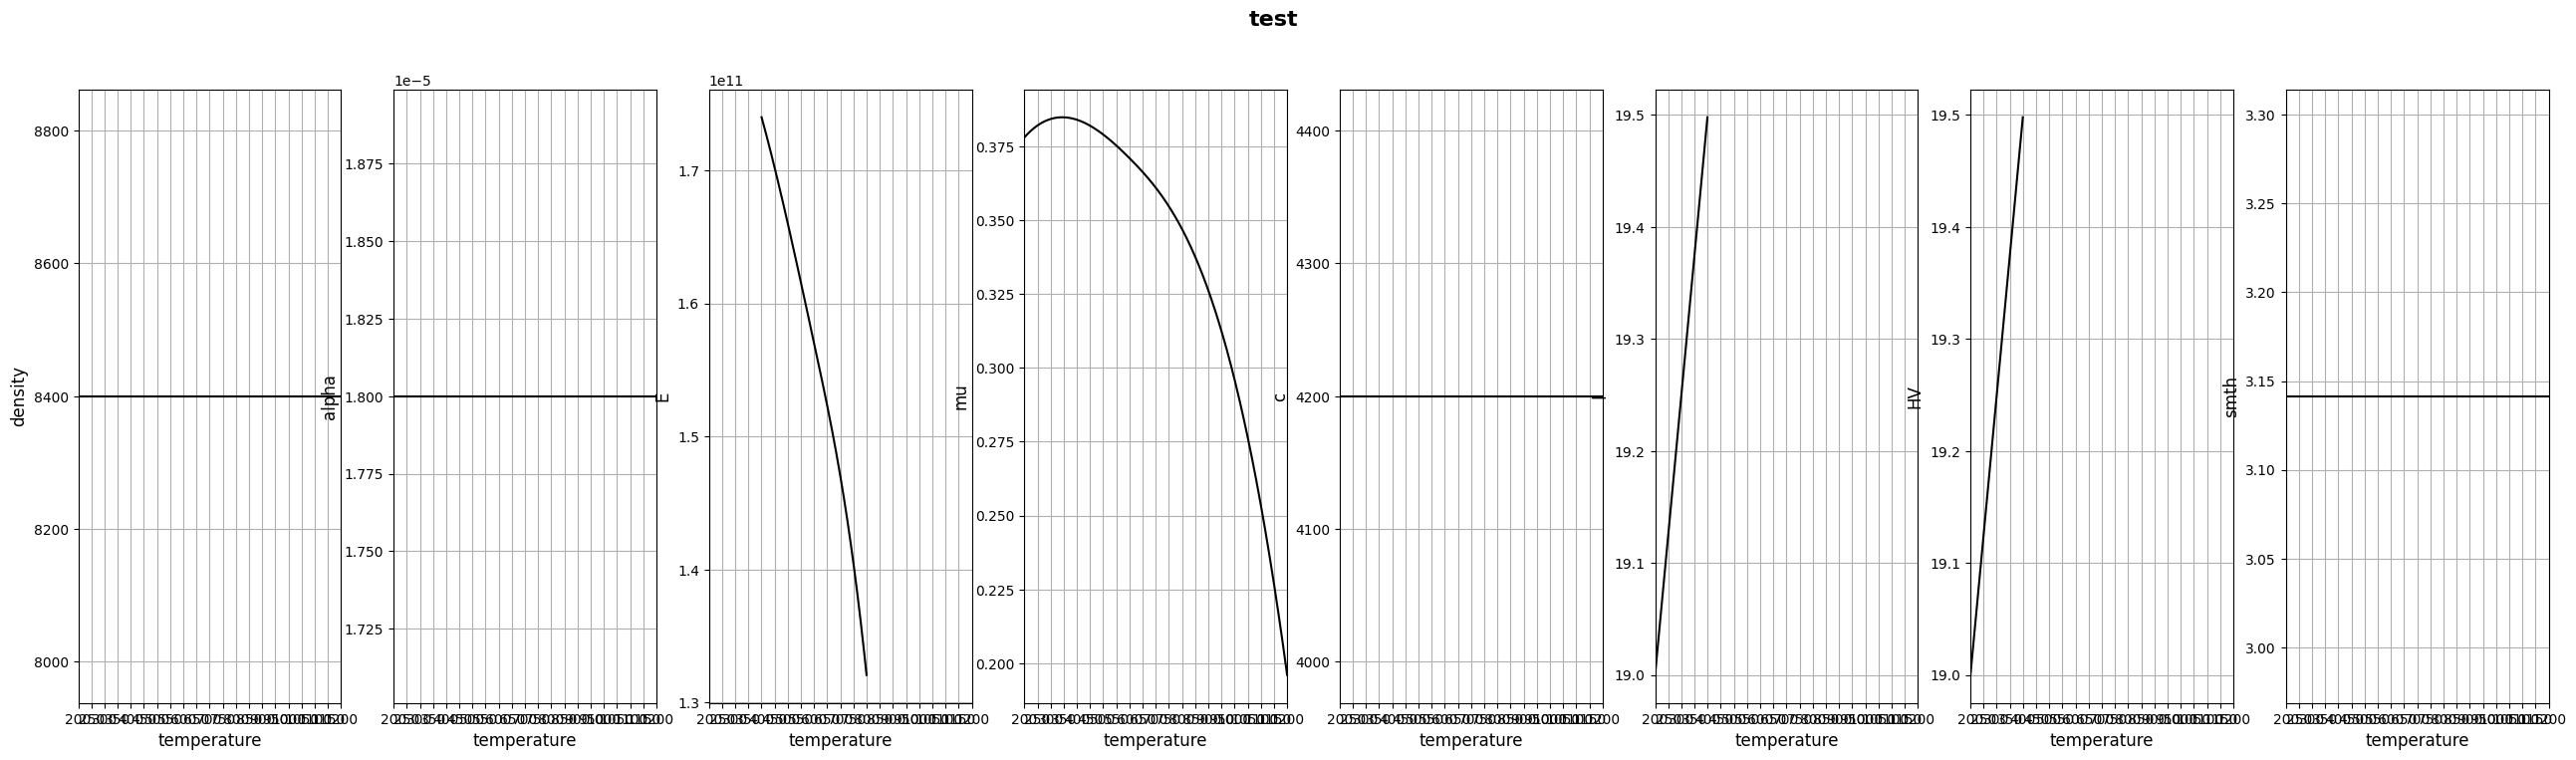

In [7]:
material.show(temperature)

ХН70МВТЮБ
	sigma_s(700): 1003882758.6206896
	sigma_t(700): 552985344.8275862
	KCU(700): nan
	sigma_100(700): nan
	sigma_200(700): nan


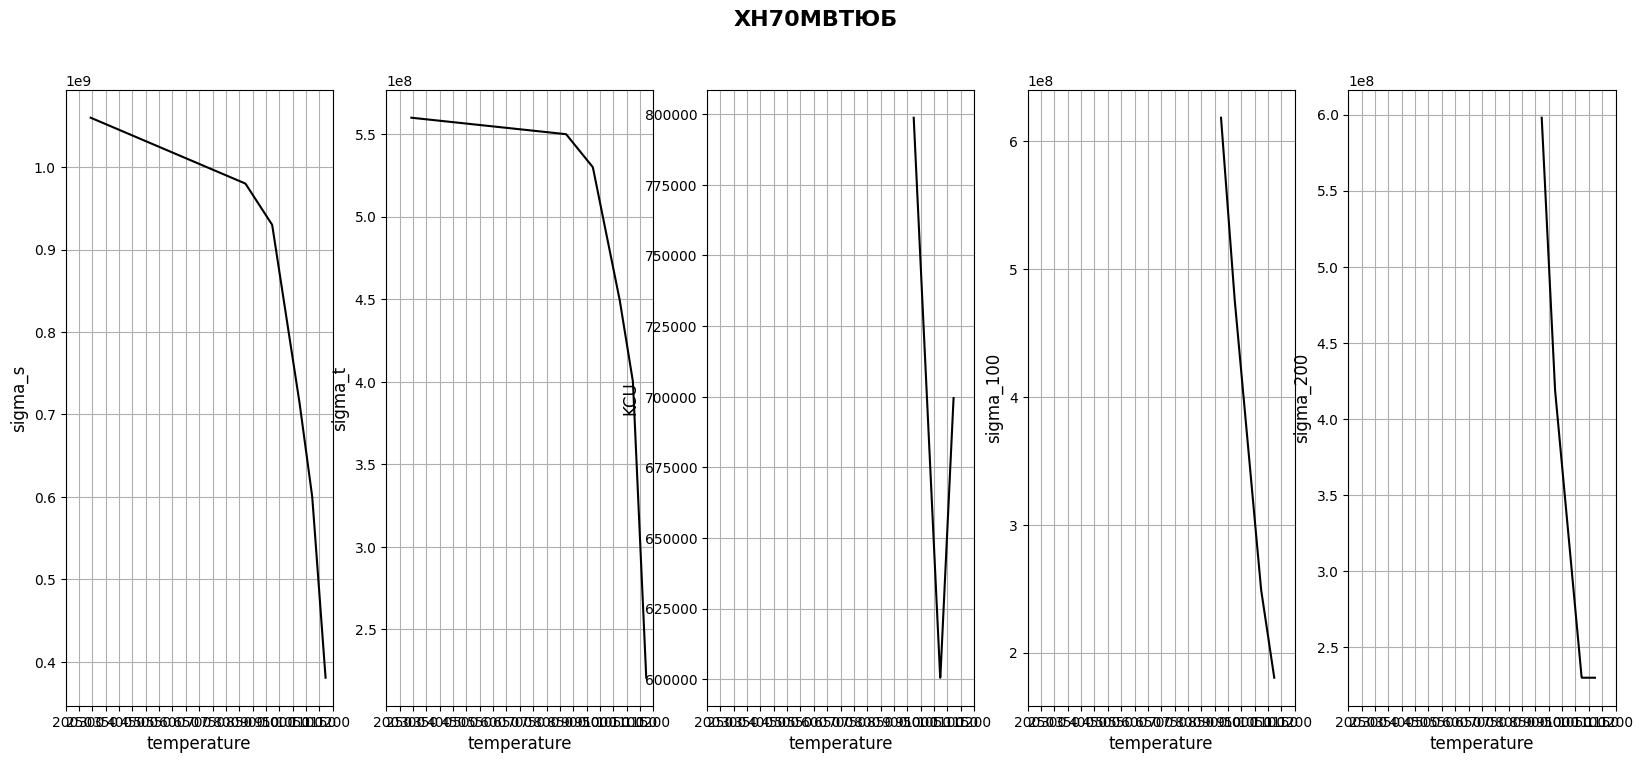

ХН80ТБЮ
	sigma_s(700): 993787685.7749468
	sigma_t(700): 616.212314225053
	KCU(700): 426874.80204756075
	sigma_1000(700): nan
	sigma_5000(700): nan
	sigma_10000(700): nan


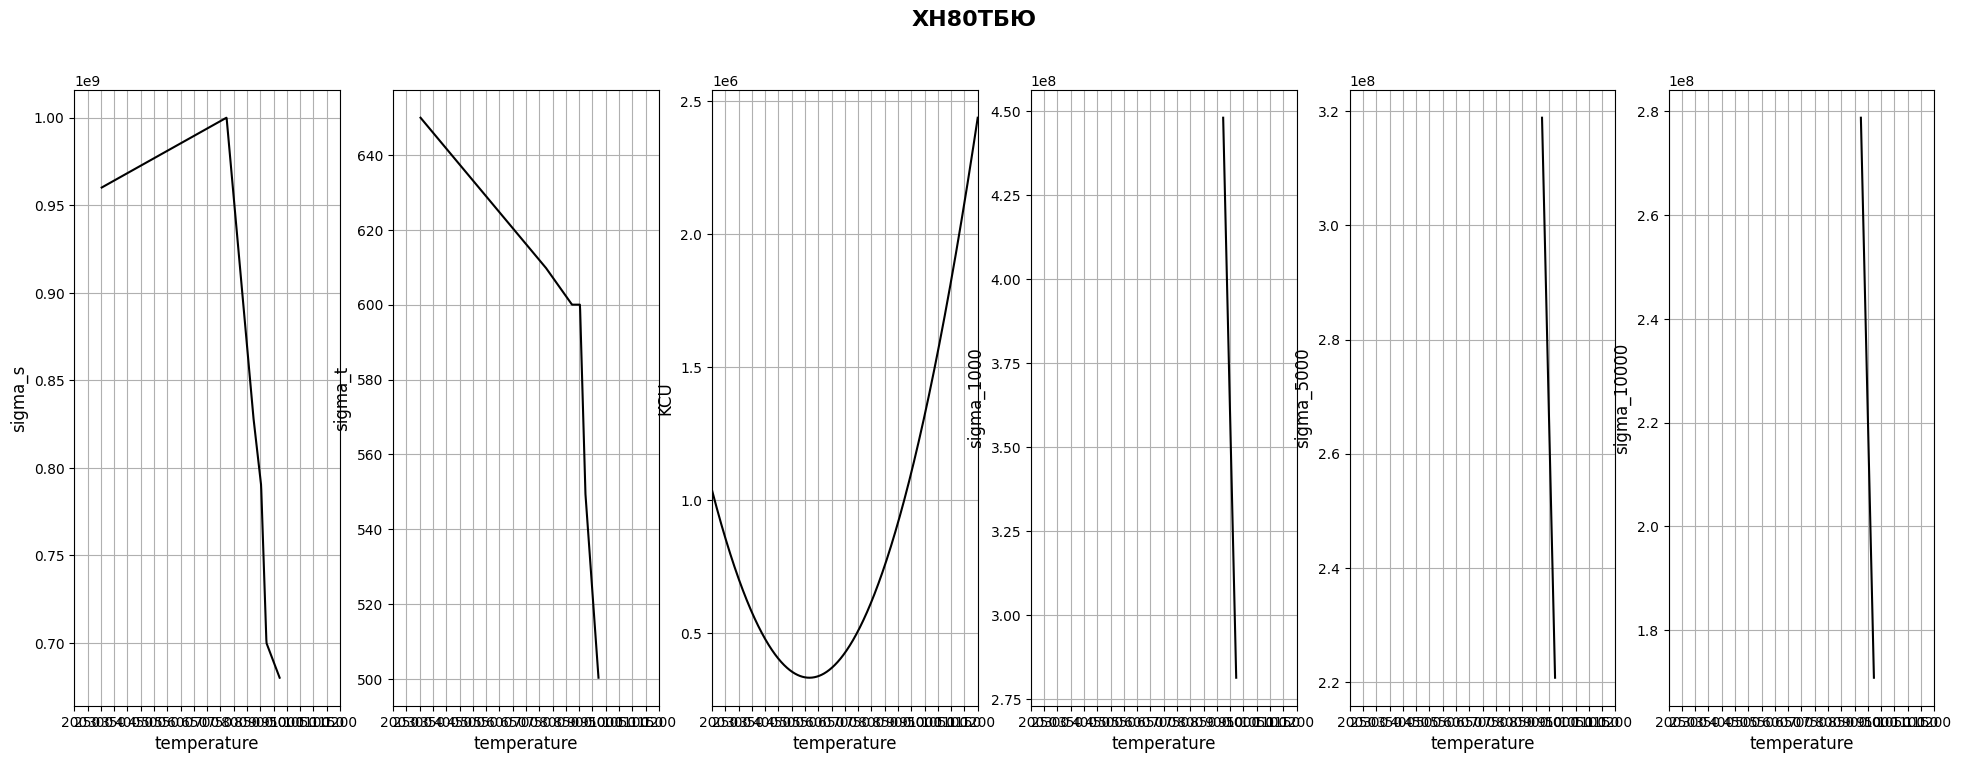

ХН70ВМТЮ
	sigma_s(700): 1021523958.3333333
	sigma_t(700): 644571875.0
	KCU(700): 884760.4166666666
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_2000(700): nan
	sigma_3000(700): nan
	sigma_5000(700): nan
	sigma_10000(700): nan
	sigma_20000(700): nan


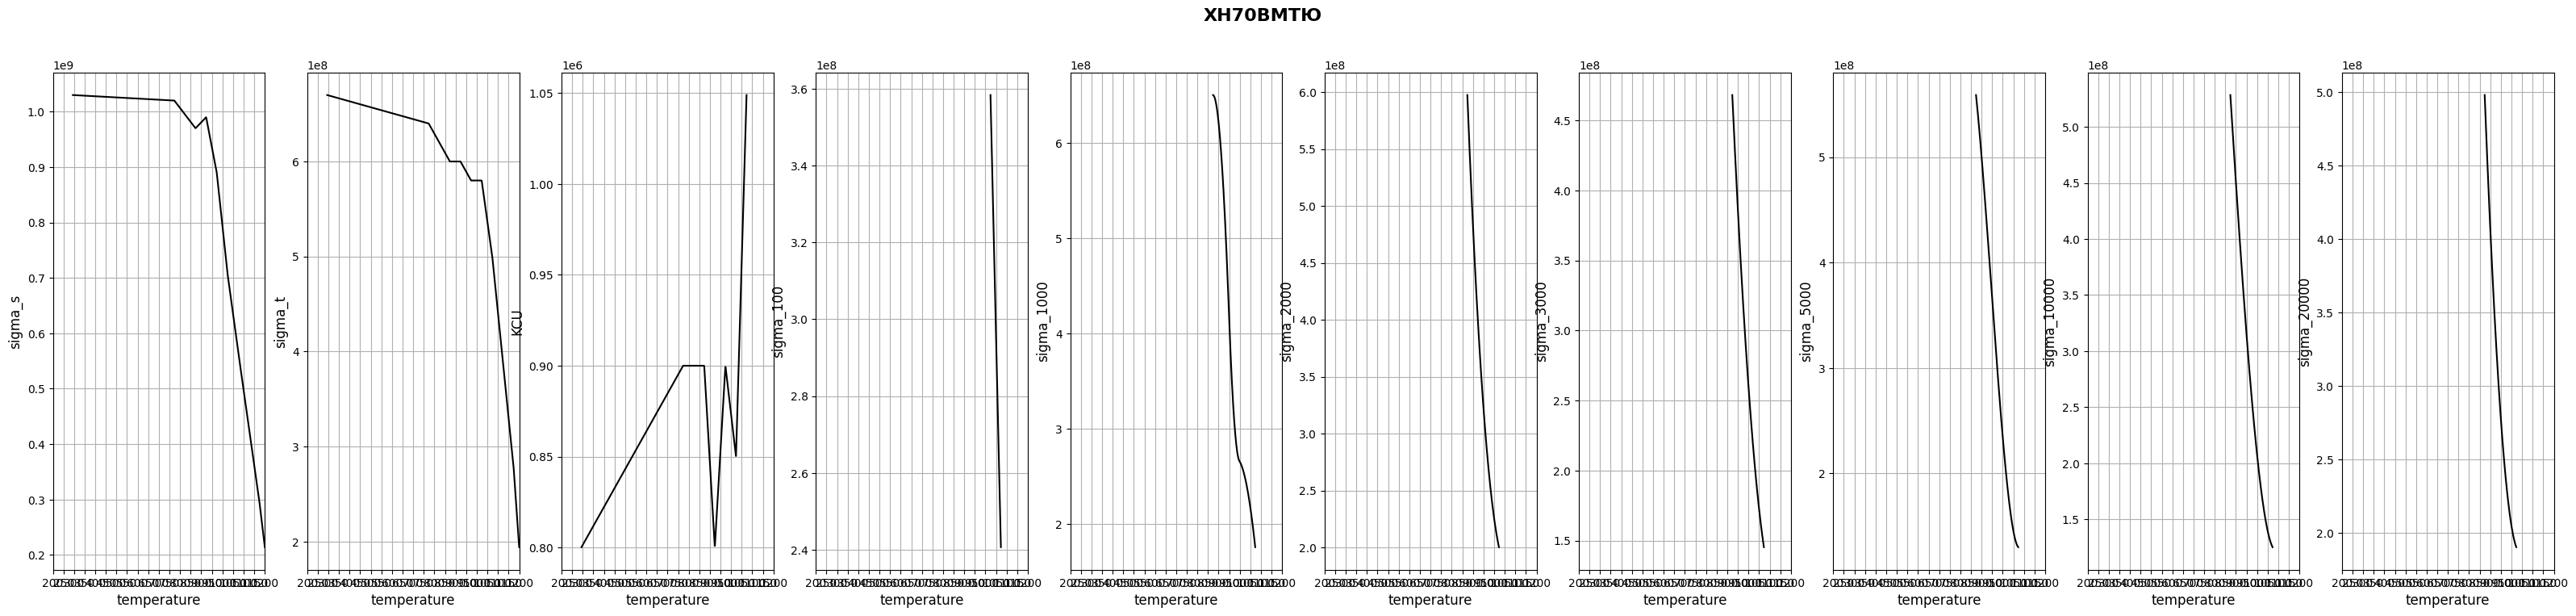

ХН55ВМКЮ
	sigma_s(700): 1088033823.5294118
	sigma_t(700): 750000000.0
	KCU(700): 259830.8823529412
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_2000(700): nan


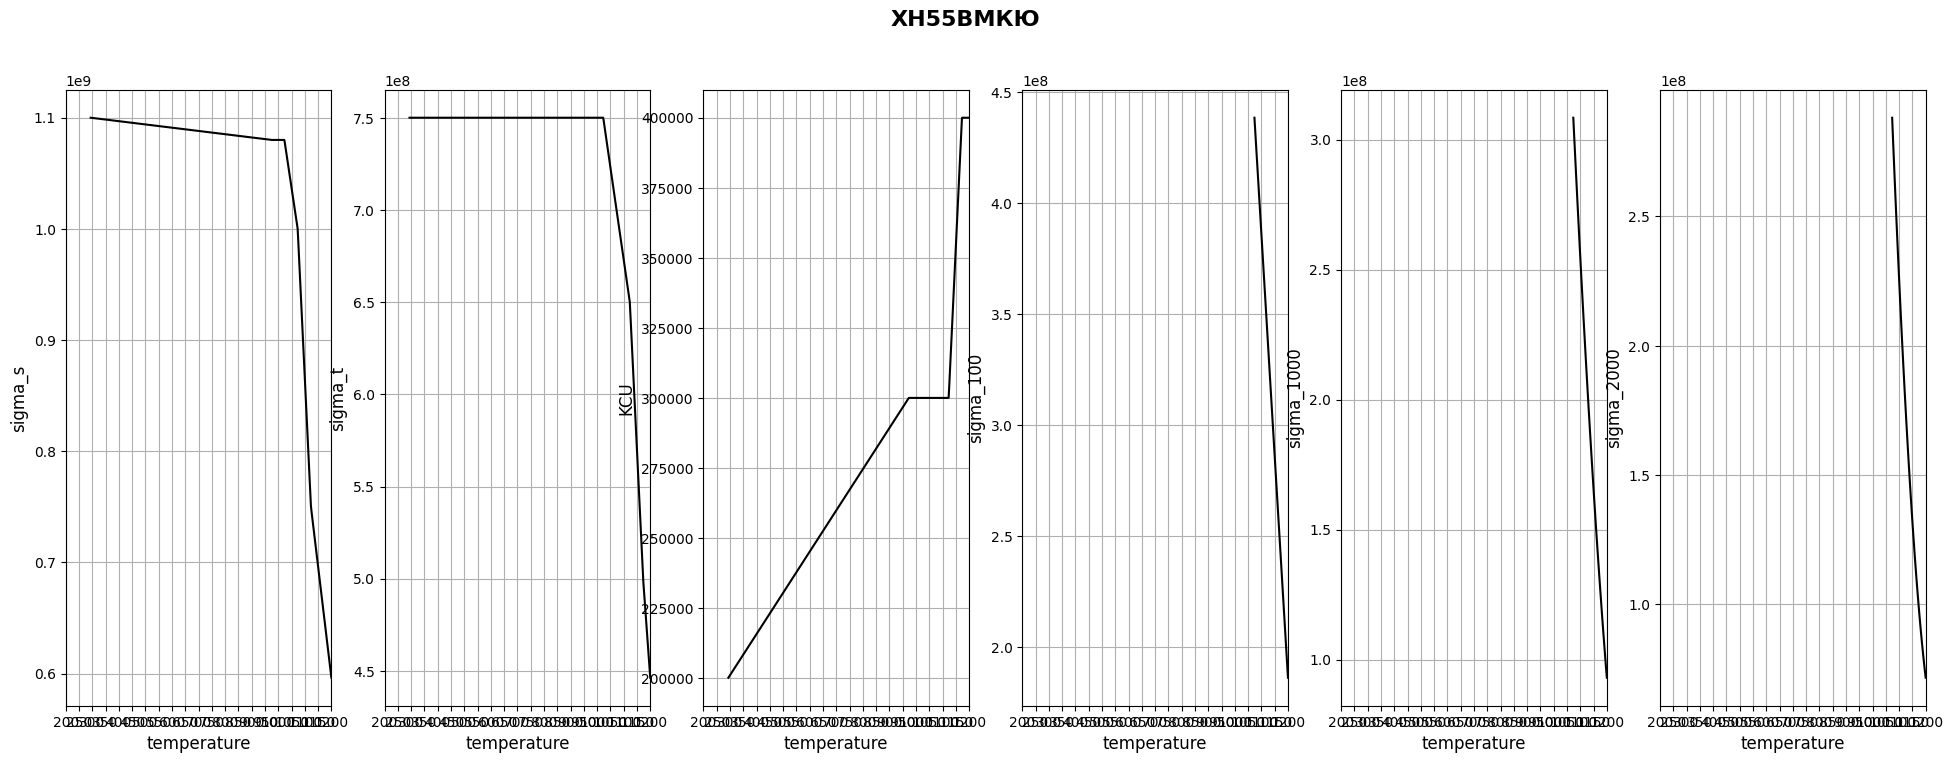

10Х18Н9Т
	sigma_s(700): 402884285.71428573
	KCU(700): 1708513.492063492
	sigma_100000(700): nan


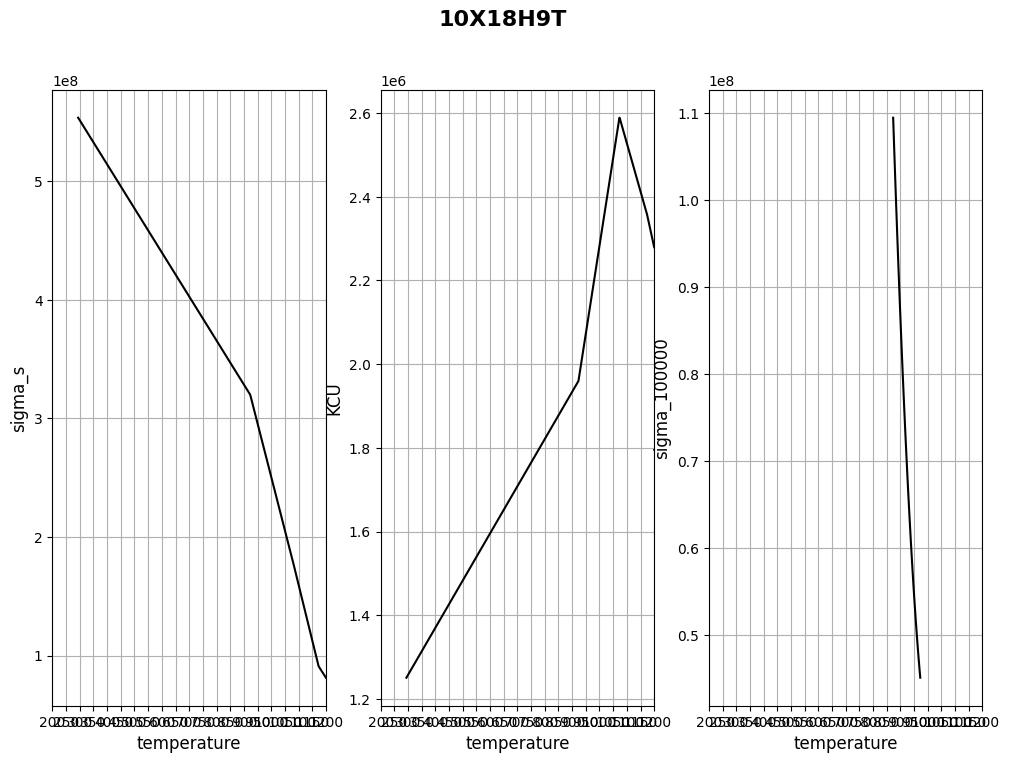

08Х18Н12М3Т
	sigma_1(700): nan
	sigma_10(700): nan
	sigma_100(700): nan
	sigma_300(700): nan
	sigma_500(700): nan
	sigma_1000(700): nan
	sigma_10000(700): nan
	sigma_100000(700): nan


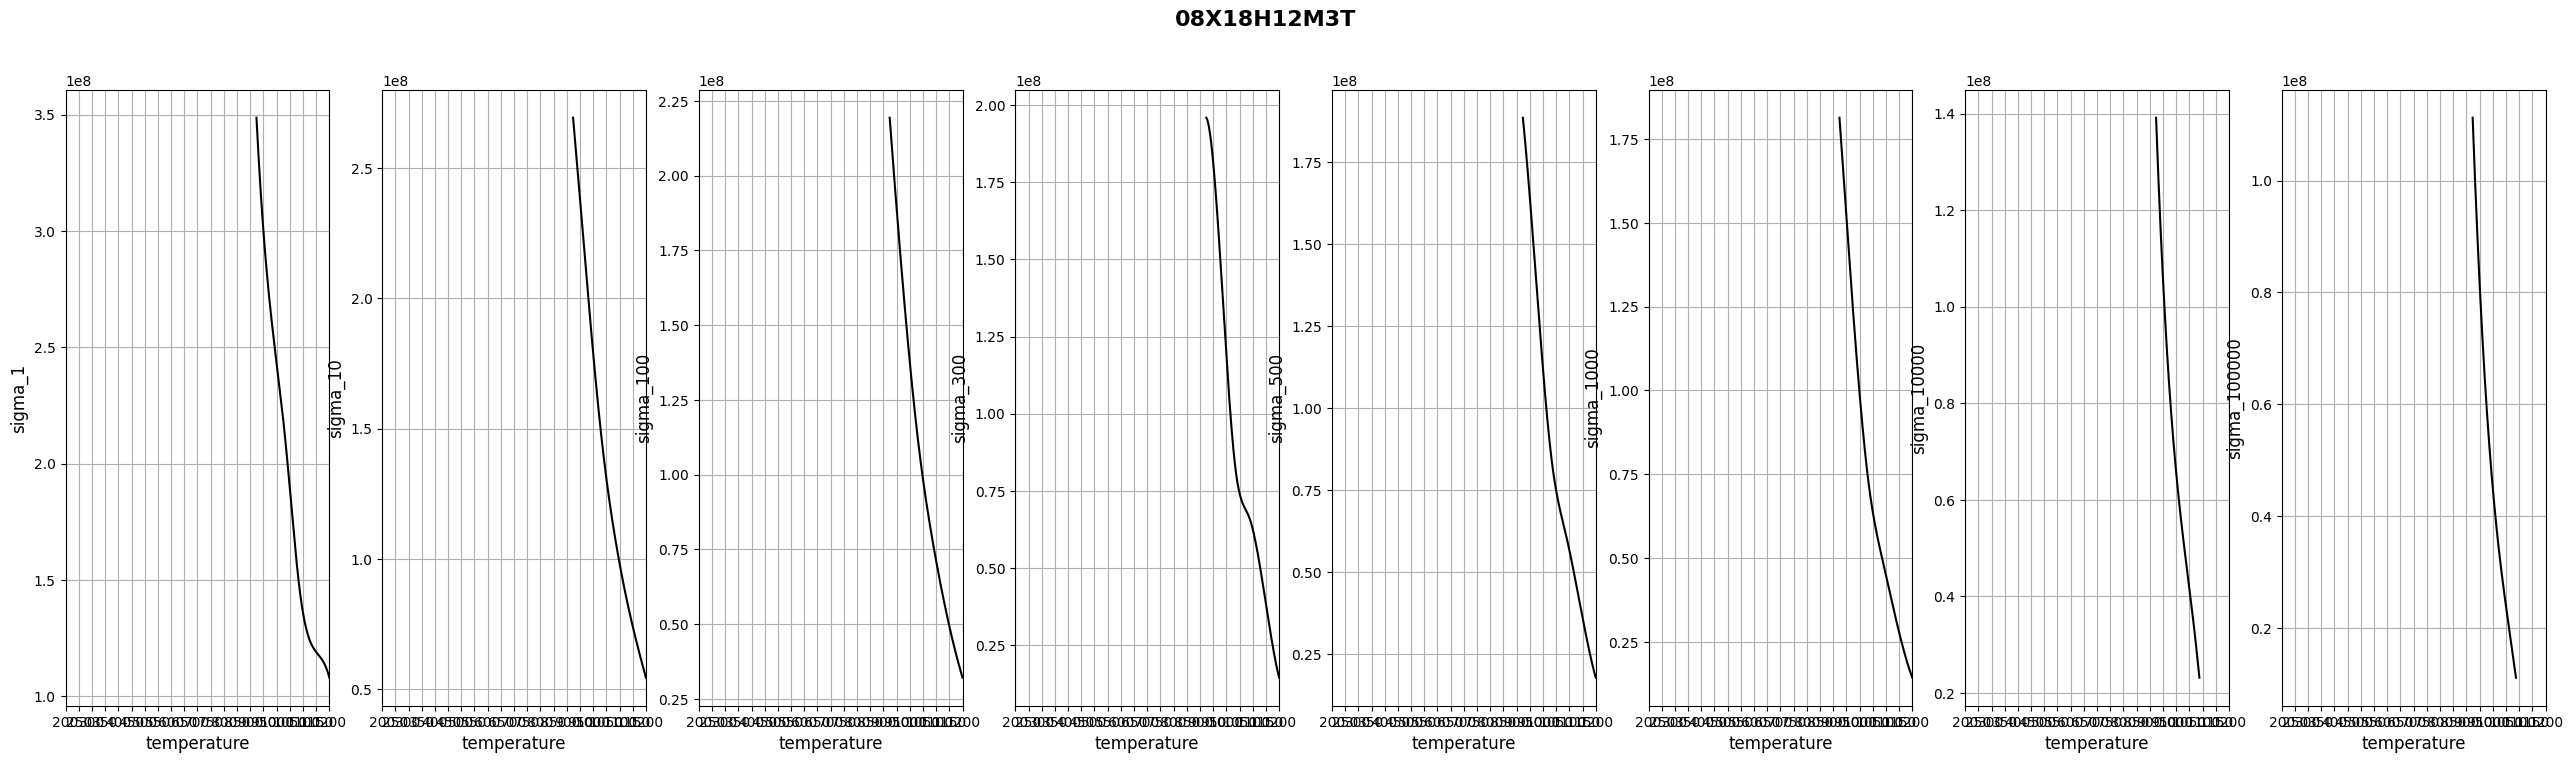

40Х15Н7ГФ2МС
	sigma_s(700): 760293641.2989424
	sigma_t(700): 525536091.4352624
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_10000(700): nan


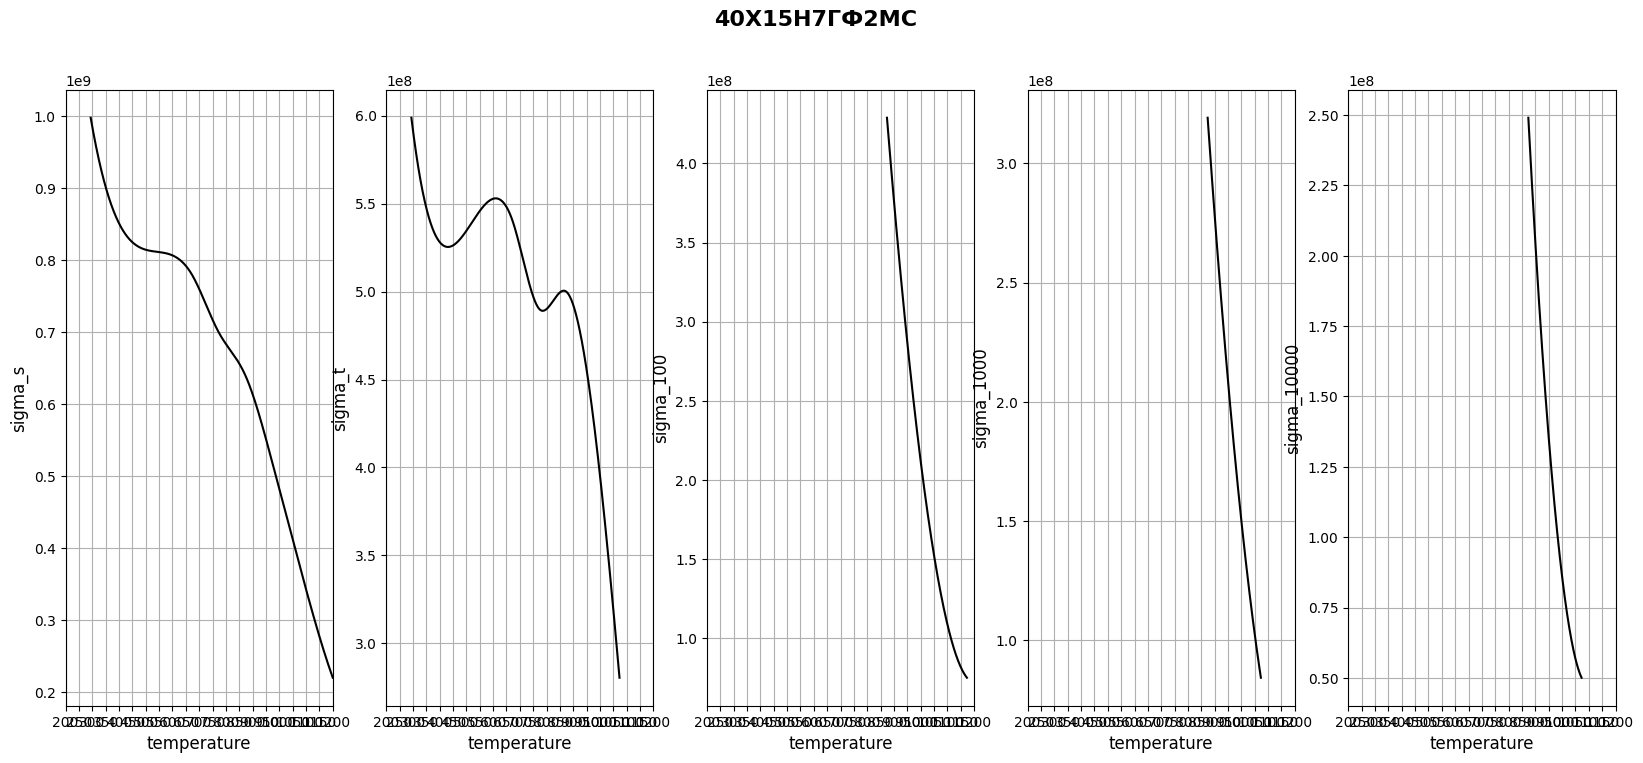

37Х12Н8Г8МФБ
	sigma_s(700): 728758817.4421233
	sigma_t(700): 498103277.20906806
	sigma_100(700): nan
	sigma_1000(700): nan
	sigma_5000(700): nan
	sigma_10000(700): nan


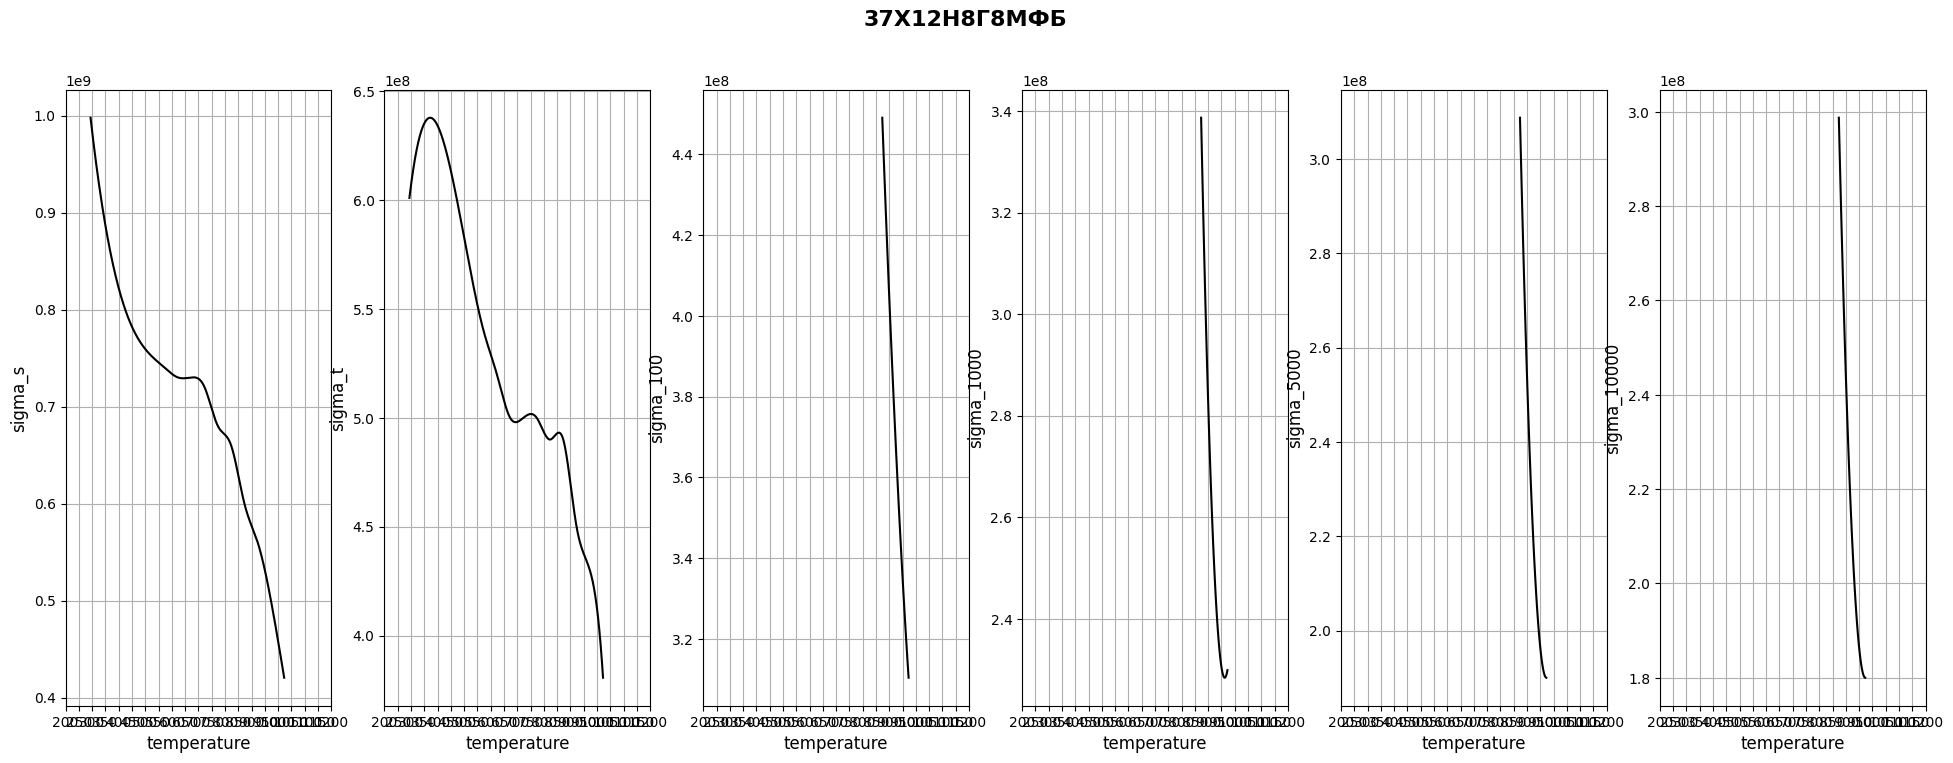

08Х16Н13М2Б
	sigma_s(700): 483365709.0749939
	sigma_t(700): 175886311.99440753
	sigma_10000(700): nan
	sigma_100000(700): nan
	alpha(700): 1.7188163653125003e-05
	E(700): 173449795385.51627
	l(700): 20.17732038584344


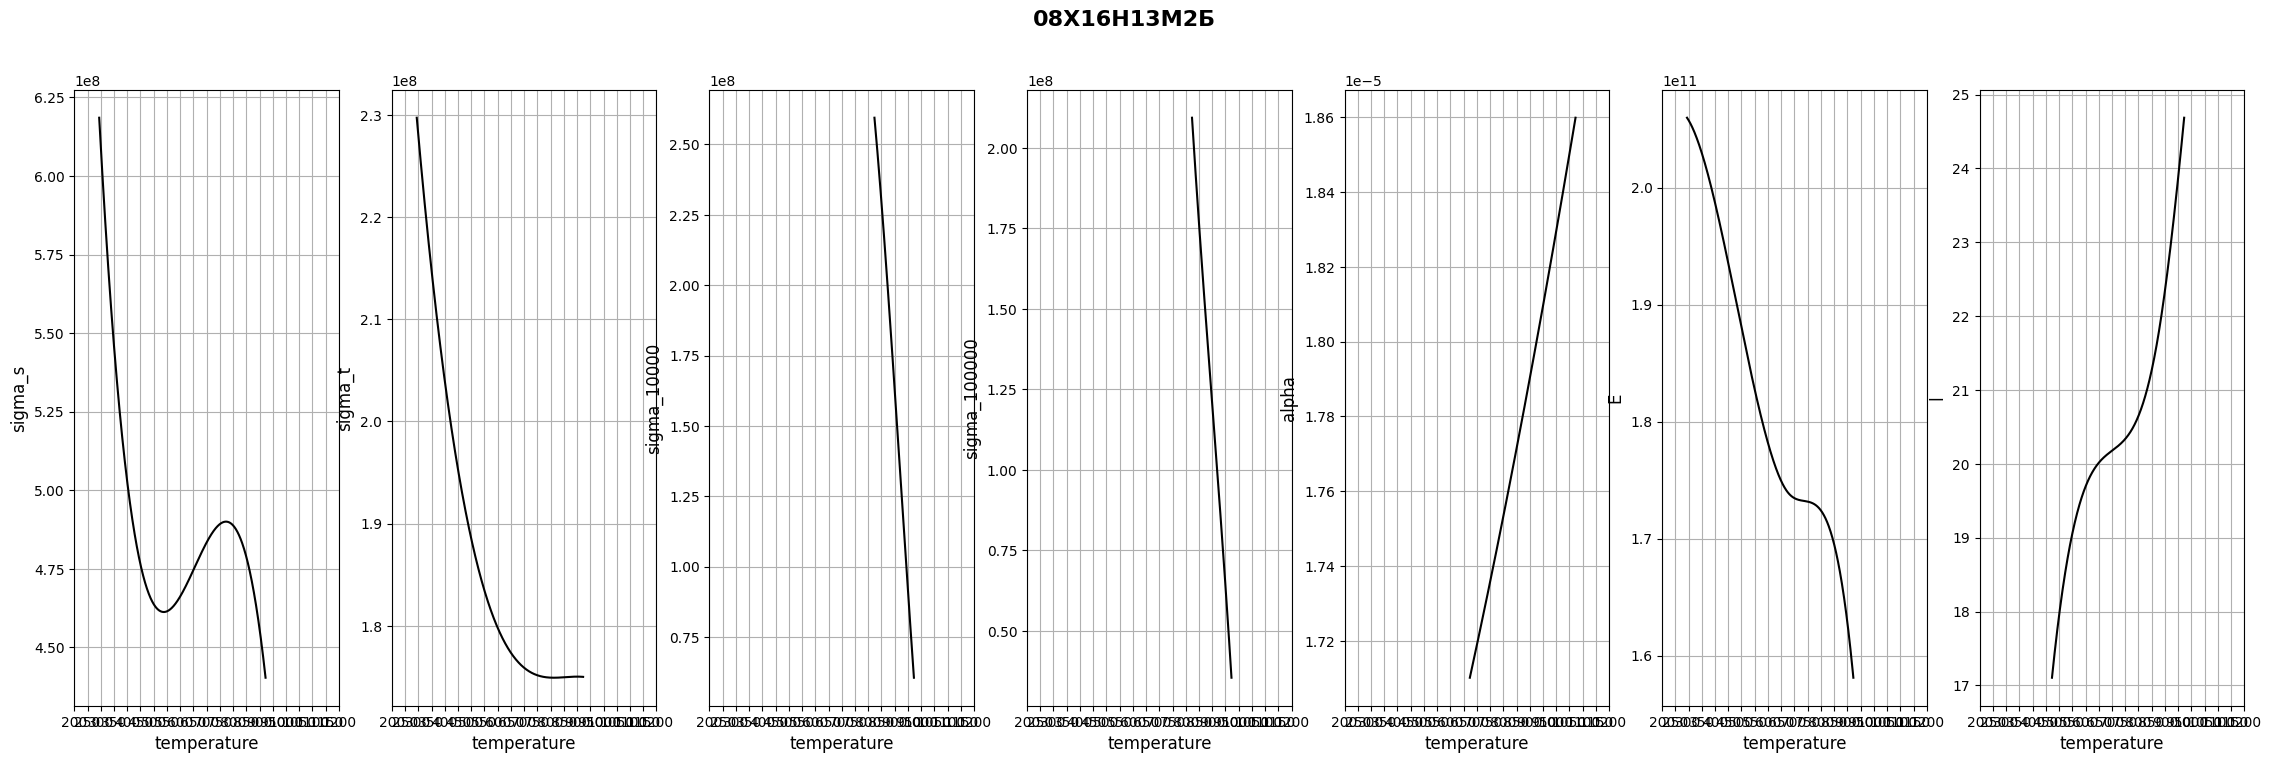

09Х14Н16Б
	sigma_s(700): 572267487.9034235
	sigma_t(700): 403260490.4435204
	KCU(700): 3156097.5988843823
	sigma_10000(700): nan
	sigma_100000(700): nan


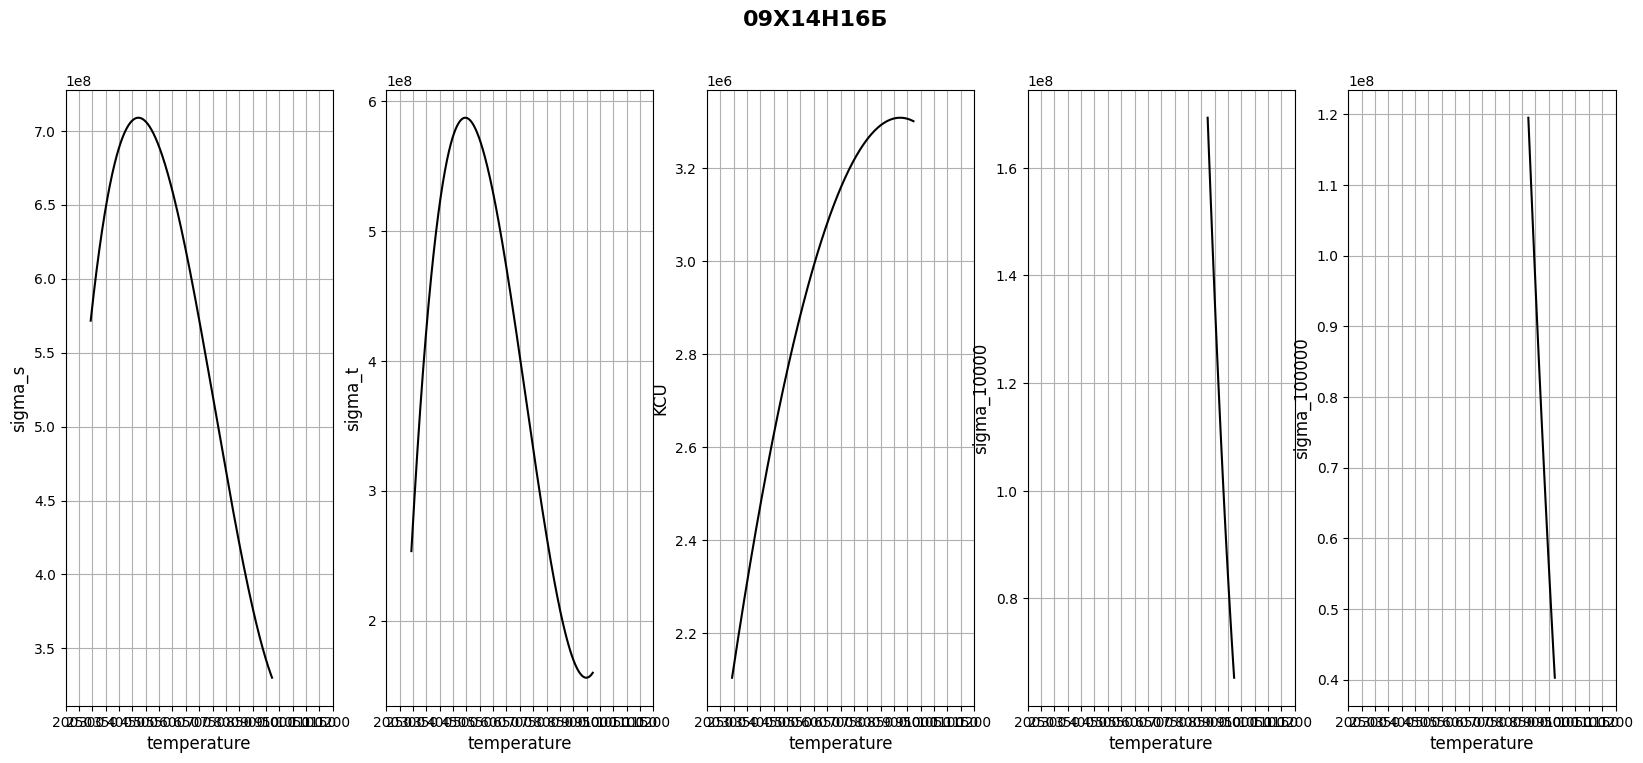

10Х11Н20Т3Р
	sigma_s(700): 933233609.1213424
	sigma_t(700): 597710717.6976212
	sigma_100(700): nan


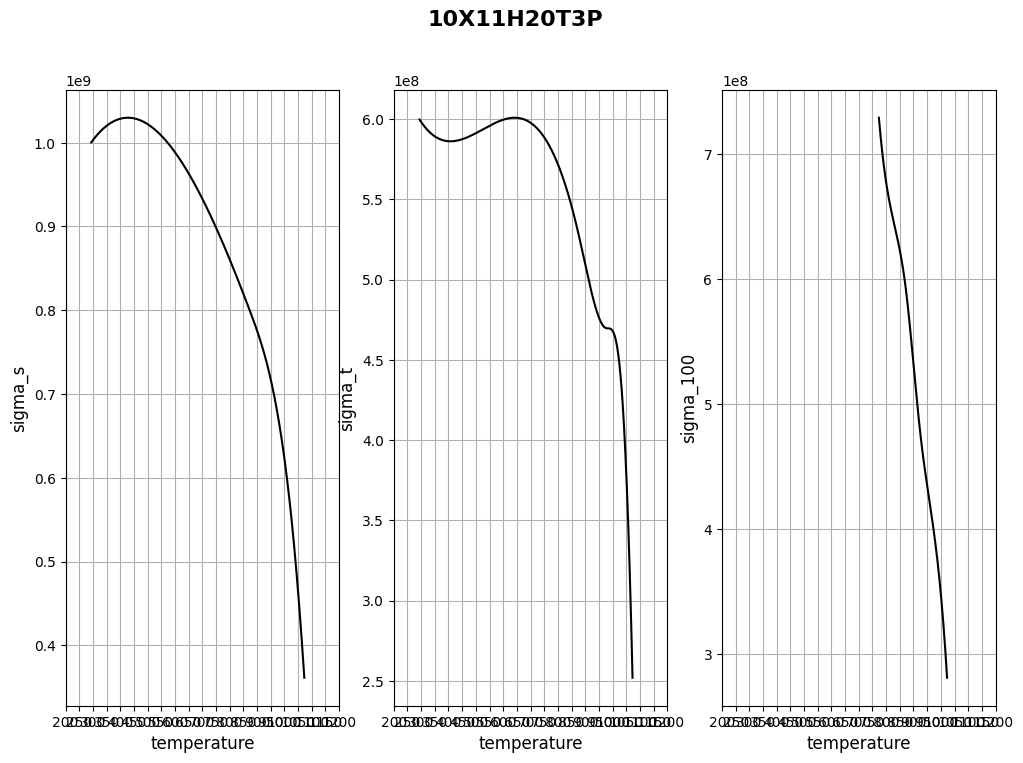

09Х14Н19В2БР
	sigma_s(700): 428989245.13030016
	sigma_t(700): 143822835.8105894
	KCU(700): 3404745.8769767485
	sigma_10000(700): nan
	sigma_100000(700): nan
	E(700): 175371526980.22137
	l(700): 19.66589362402424
	alpha(700): 1.7608976027875e-05


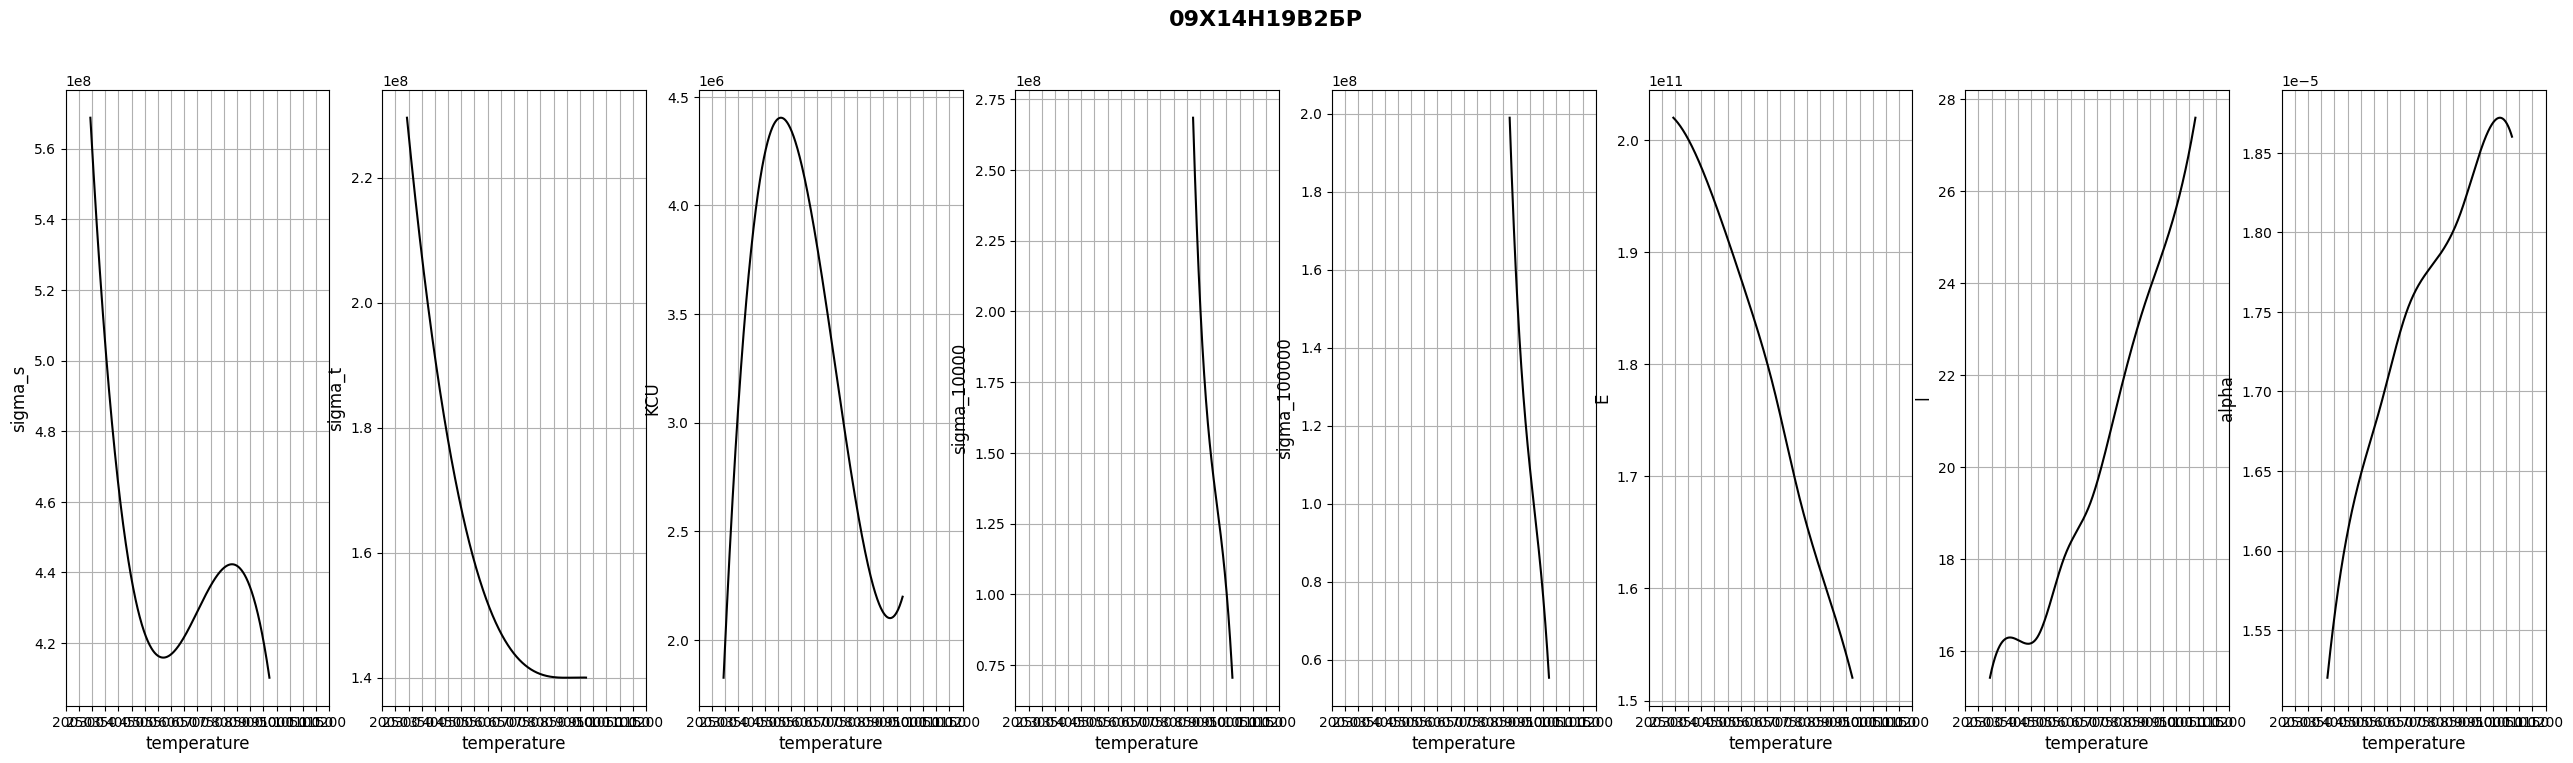

08Х15Н24В4ТР
	sigma_s(700): 500057545.2608143
	sigma_t(700): 636619305.6070133
	KCU(700): -4988194.081694438
	sigma_1000(700): nan
	sigma_10000(700): nan
	sigma_100000(700): nan


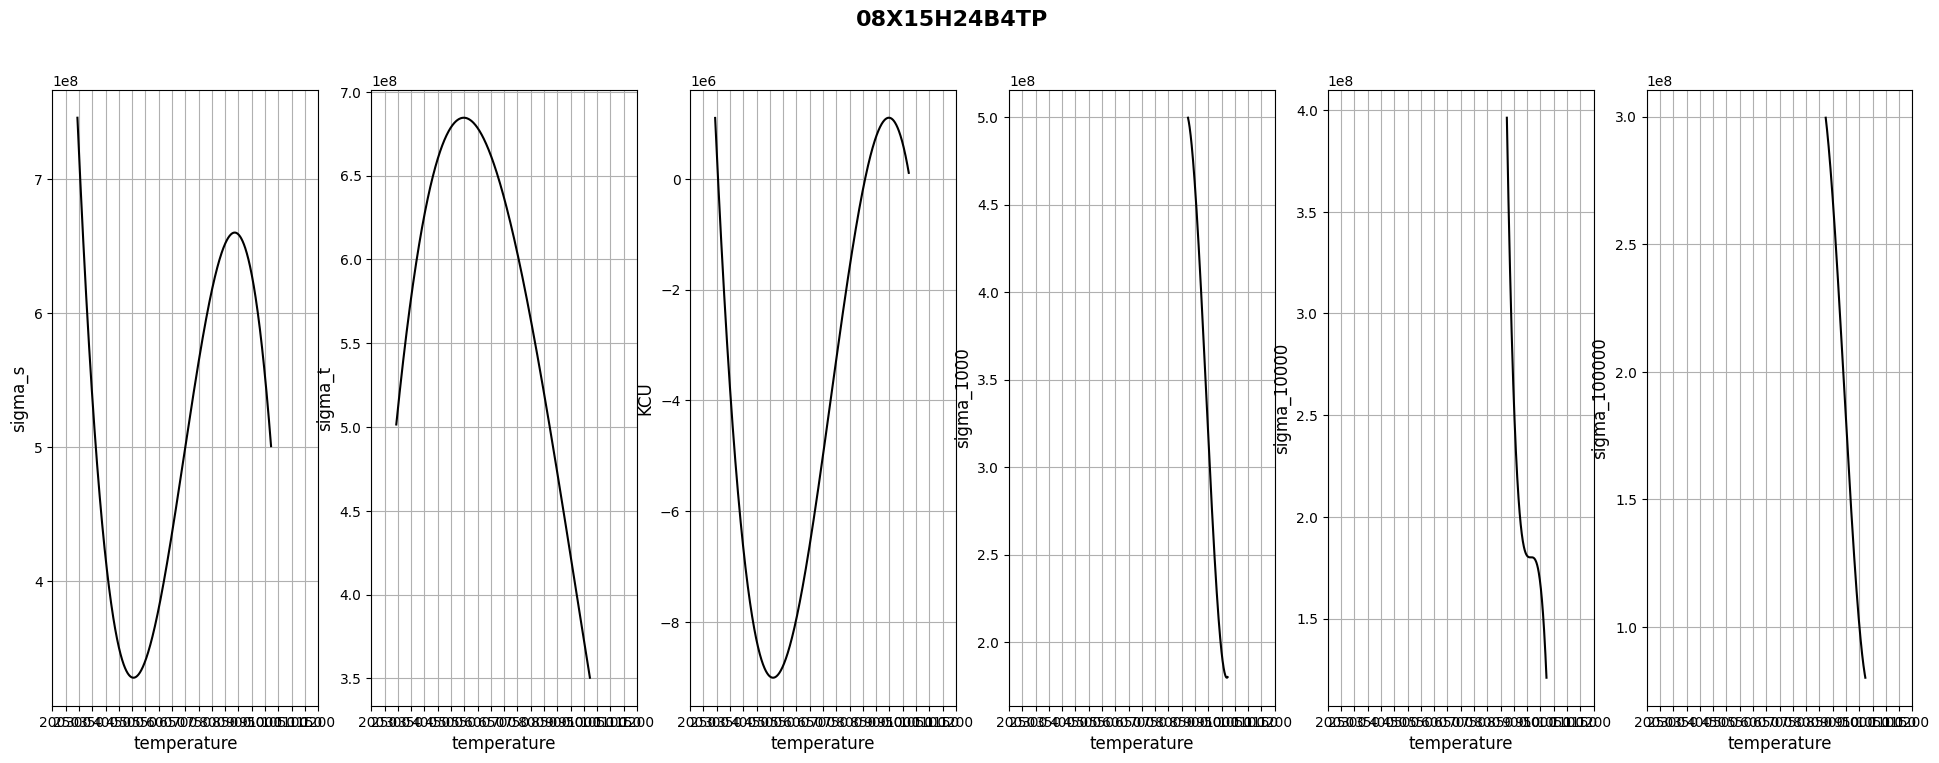

In [8]:
for material in materials:
    print(material.name)
    for k, v in material.__dict__.items():
        if callable(v):
            print('\t' + f'{k}({t}): {v(t)}')
    material.show(temperature)